In [52]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
ols=LinearRegression()
data=pd.read_csv("DataLab2.csv",sep=";")
data.head()


,Dates,SP500,MICROSOFT,CPI,PPI,MSUPPLY,CCREDIT,SCREDIT,T3M,T6M,T1Y,T3Y,T5Y,T10Y
0,31/01/1987,274.08,0.2539,111.4,100.5,730.2,653.26748,2.64,5.58,5.67,5.78,6.41,6.64,7.08
1,27/02/1987,284.20,0.2665,111.8,101.0,730.7,652.53230,2.40,5.75,5.83,5.96,6.56,6.79,7.25
2,31/03/1987,291.70,0.3359,112.2,101.2,733.8,651.19767,2.36,5.77,5.86,6.03,6.58,6.79,7.25
3,30/04/1987,288.36,0.3611,112.7,101.9,743.9,656.40142,2.02,5.82,6.19,6.50,7.32,7.57,8.02
4,29/05/1987,290.10,0.4002,113.0,102.6,745.8,658.47003,1.90,5.85,6.35,7.00,8.02,8.26,8.61


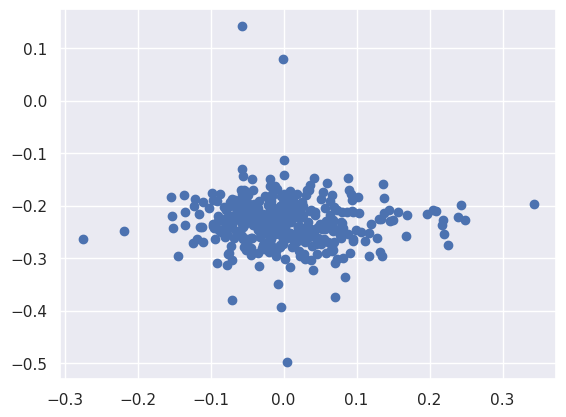

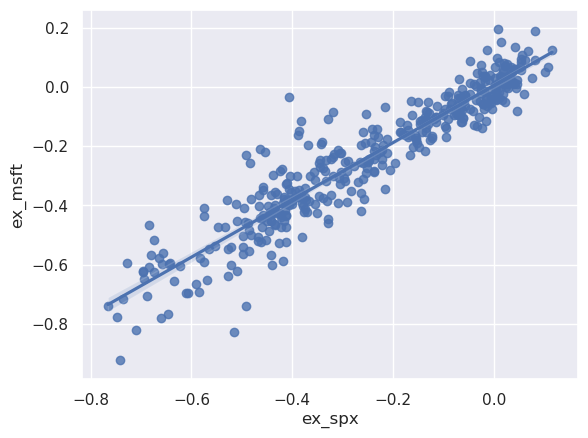

In [92]:
###################### computing data######################
rf=data["T3M"]/12
rspx=data["SP500"].pct_change()[1:]
ex_spx = rspx-rf[1:]
data["ex_spx"]=ex_spx

rmsft=data["MICROSOFT"].pct_change()[1:]
ex_msft = rmsft-rf[1:]
data["ex_msft"]=ex_msft
###################### regression######################
ols.fit(ex_msft.values.reshape(-1,1),ex_spx.values.reshape(-1,1))

###################### computing the prediction value#########
y_reg= ols.intercept_+ols.coef_*ex_msft.values
#equivalent : y_hat=ols.predict(ex_msft.values.reshape(-1,1))
#print(y_reg.reshape(-1,1)-ols.predict(ex_msft.values.reshape(-1,1)).reshape(-1,1))
est_errors = y_reg.reshape(-1,1) - ex_spx.values.reshape(-1,1)



######################  plotting errors ######################
plt.plot(est_errors,y_hat,"o")
plt.show()

###################### plotting regression line
sns.set_theme(color_codes=True)
sns.regplot(x="ex_spx",y="ex_msft", data=data)
plt.show()

In [79]:
##################################################################
###################### APT MODEL #################################
##################################################################

###################### data computing#####################
DP = list(data["PPI"].diff().values[1:])
DC = list(data["CCREDIT"].diff().values[1:])
DM = list(data["MSUPPLY"].diff().values[1:])
DS = list(data["SCREDIT"].diff().values[1:])
DI = list(data["CPI"].diff().values[1:])
DT = list((data["T10Y"]-data["T3M"]).diff().values[1:])
var = pd.DataFrame({"DP" : DP, "DC": DC, "DM": DM, "DS": DS, "DI": DI, "DT": DT,"MSFT":list(ex_msft)})
X=var[["DP","DC","DM","DS","DI","DT"]]

######################regression######################
ols.fit(X,ex_msft)

###################### R squared ######################
Rsq=1-(1-ols.score(X,ex_msft))*((412-1)/(412-1-6))
y_hat = ols.predict(X)
ESS=  sum((ex_msft-y_hat)**2)



In [94]:
###################### statsmodel package (more convenient)######################

import statsmodels.formula.api as smf
Xbis=var[["DP","DC","DM","DS","DI","DT","MSFT"]]
ols_bis = smf.ols(formula='MSFT ~ DP+DC+DM+DS+DI+DT', data=Xbis)
fitted_model = ols_bis.fit()
fitted_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSFT   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     3.200
Date:                Mon, 14 Feb 2022   Prob (F-statistic):            0.00442
Time:                        13:07:37   Log-Likelihood:                 44.668
No. Observations:                 413   AIC:                            -75.34
Df Residuals:                     406   BIC:                            -47.17
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2314      0.017    -13.956      0.000      -0.264      -0.199
DP             0.0073      0.010      0.739      0.461      -0.012       0.027
DC             0.0023      0.001      2.541      0.011       0.001       0.004
DM          2.954e-05   1.95e-05      1.512      0.131   -8.88e-06     6.8e-05
DS            -0.1439      0.064     -2.232      0.026      -0.271      -0.017
DI            -0.0637      0.033     -1.939      0.053      -0.128       0.001
DT             0.0696      0.048      1.453      0.147      -0.025       0.164
==============================================================================
Omnibus:                       15.831   Durbin-Watson:                   0.459
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.378
Skew:                          -0.396   Prob(JB):                     0.000755
Kurtosis:                       2.544   Cond. No.                     3.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

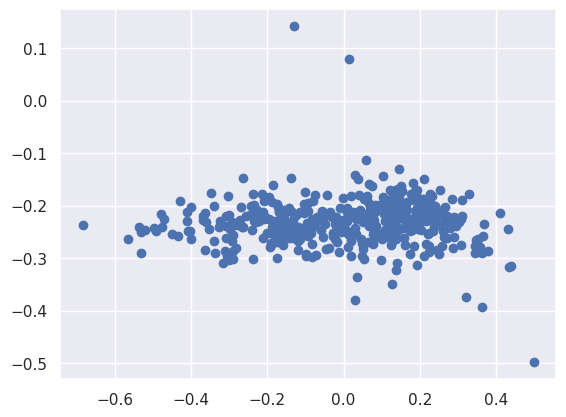

In [49]:
###################### plotting regression errors######################
y_hat_apt=ols.predict(X)

eps_apt=ex_msft-y_hat_apt
plt.plot(eps_apt,y_hat_apt,'o')
plt.show()

###################### plotting regression line######################




